In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices


{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.6484999  0.6367352  0.70340186]
  [0.6514699  0.6397052  0.70637184]
  [0.6544399  0.6426752  0.7093419 ]
  ...
  [0.5578359  0.5290178  0.59244645]
  [0.50301296 0.47556198 0.5383071 ]
  [0.43812117 0.4106702  0.4734153 ]]

 [[0.6189105  0.6071458  0.67381245]
  [0.61924046 0.60747576 0.6741424 ]
  [0.61957043 0.6078057  0.6744724 ]
  ...
  [0.56872594 0.5405679  0.6036665 ]
  [0.49509296 0.46764198 0.53038704]
  [0.43317112 0.40572014 0.46846527]]

 [[0.6191039  0.6073392  0.67400587]
  [0.61745393 0.6056892  0.6723559 ]
  [0.61580396 0.60403925 0.6707059 ]
  ...
  [0.57961595 0.5521179  0.6148865 ]
  [0.48717293 0.45972195 0.522467  ]
  [0.42822114 0.40077016 0.46351525]]

 ...

 [[0.7649626  0.76104105 0.82378614]
  [0.7848752  0.78095365 0.84369874]
  [0.84245515 0.8385336  0.9012787 ]
  ...
  [0.5531294  0.5492078  0.61195296]
  [0.5557694  0.5518478  0.61459297]
  [0.5584094  0.5544878  0.617233  ]]

 [[0.7666126  0.762691   0.8254362 ]
  [0.78982526 0.7859037  0.8486488 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.70822334 0.6768508  0.7278312 ]
  [0.70894104 0.6775685  0.7285489 ]
  [0.7096587  0.67828614 0.7292665 ]
  ...
  [0.48854676 0.43756637 0.47678205]
  [0.4799791  0.4289987  0.4682144 ]
  [0.4784314  0.427451   0.4666667 ]]

 [[0.70273465 0.6713621  0.7223425 ]
  [0.7023759  0.67100334 0.72198373]
  [0.702017   0.67064446 0.72162485]
  ...
  [0.48747024 0.43648982 0.47570553]
  [0.47926143 0.428281   0.46749672]
  [0.4784314  0.427451   0.4666667 ]]

 [[0.708912   0.67753947 0.72851986]
  [0.7074767  0.6761041  0.7270845 ]
  [0.70604134 0.6746688  0.7256492 ]
  ...
  [0.48639375 0.43541333 0.47462904]
  [0.47854376 0.42756334 0.46677905]
  [0.4784314  0.427451   0.4666667 ]]

 ...

 [[0.5729122  0.5611475  0.6356573 ]
  [0.59249395 0.58072925 0.65523905]
  [0.61588496 0.60412025 0.67863005]
  ...
  [0.48219407 0.44689995 0.5135666 ]
  [0.48075873 0.4454646  0.5121313 ]
  [0.4793234  0.44402927 0.5106959 ]]

 [[0.57470644 0.56294173 0.6374515 ]
  [0.594647   0.5828823  0.6573921 ]


In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32


47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=10,
)

Epoch 1/10


c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.4797 - loss: 0.9178 - val_accuracy: 0.5052 - val_loss: 0.8153
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 0.7431 - val_accuracy: 0.3913 - val_loss: 0.9441


c:\Users\Gen\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.6338 - loss: 0.7434 - val_accuracy: 0.7448 - val_loss: 0.6277
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8125 - loss: 0.4650 - val_accuracy: 0.7391 - val_loss: 0.5274
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7317 - loss: 0.6051 - val_accuracy: 0.7448 - val_loss: 0.4932
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.4537 - val_accuracy: 0.6522 - val_loss: 0.6397
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.8277 - loss: 0.4117 - val_accuracy: 0.7604 - val_loss: 0.4938
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3821 - val_accuracy: 0.8261 - val_loss: 0.3464
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.8023 - loss: 0.4603 - val_accuracy: 0.8177 - val_loss: 0.3789
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8125 - loss: 0.4079 - val_accuracy: 0.7391 - val_loss

In [16]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 730ms/step - accuracy: 0.8523 - loss: 0.3826


In [17]:
scores


[0.34882643818855286, 0.8723897933959961]

In [18]:
history


In [19]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 47}

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [21]:
val_acc

[0.5052083134651184,
 0.3913043439388275,
 0.7447916865348816,
 0.739130437374115,
 0.7447916865348816,
 0.6521739363670349,
 0.7604166865348816,
 0.8260869383811951,
 0.8177083134651184,
 0.739130437374115]

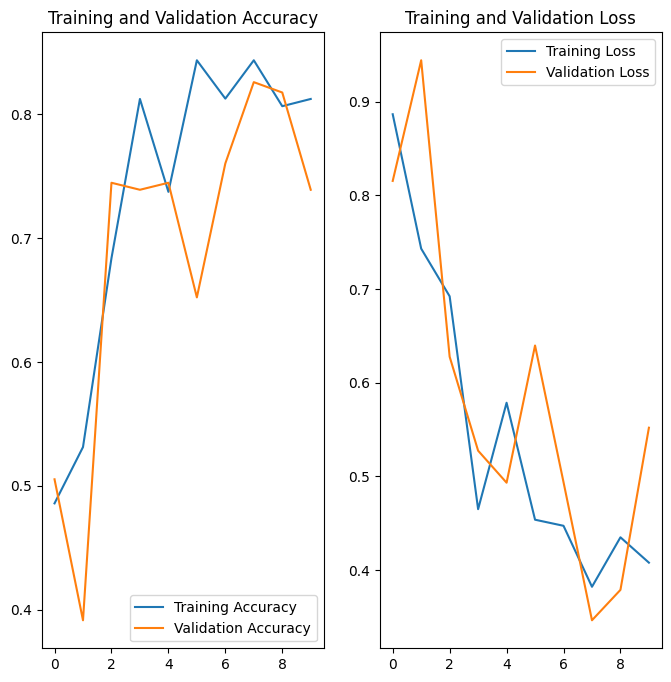

In [23]:
EPOCHS = 10

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
predicted label: Potato___Late_blight


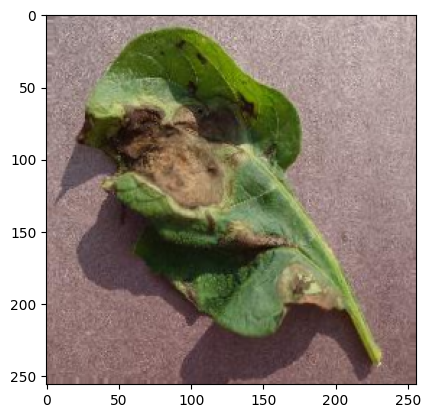

In [26]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


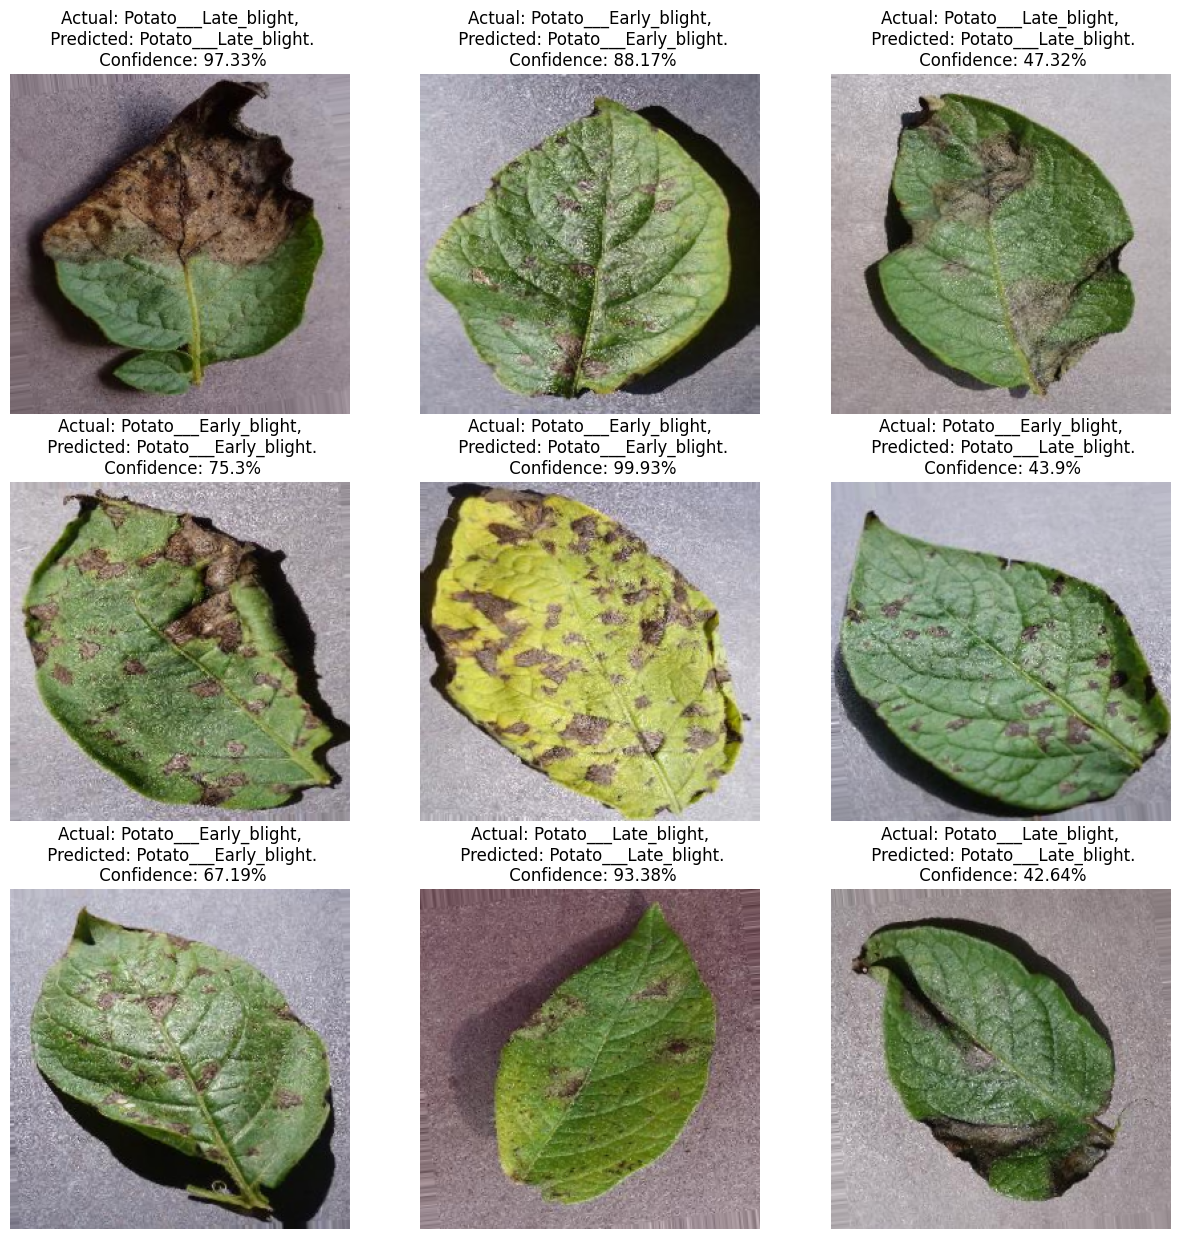

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [29]:
model.save("../potatoes.h5")
